In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, plot_confusion_matrix
from itertools import chain

In [2]:
# Data params
textures = 11
trials = 100

In [3]:
# Import dataset and labels from pickle
PATH = "/home/farscope2/Documents/PhD/Spiking Nets Project/SpikingNetsTexture/datasets/TacTip_NM/total_spikes/"
DATA_NAME = "Total spikes per texture dataset.pickle"
LABEL_NAME = str(textures) + " textures - " + str(trials) + " trials labels.pickle"
GRAPH_PATH = "/home/farscope2/Documents/PhD/Spiking Nets Project/SpikingNetsTexture/graphs/spike_classifier/"


# Import dataset first
FILENAME = PATH + DATA_NAME

# Create array of intensities for heatmap
with(open(FILENAME, "rb")) as openfile:
    try:
        dataset = pickle.load(openfile)
    except EOFError:
        print(EOFError)
        
# Now import label array
FILENAME = PATH + LABEL_NAME

# Create array of intensities for heatmap
with(open(FILENAME, "rb")) as openfile:
    try:
        labels = pickle.load(openfile)
    except EOFError:
        print(EOFError)

In [4]:
# WARNING: Dataset created from previous script contains a NULL row 0
#          This row has currently been deleted and saved over the initial dataset
#          Note for next time is to fix this bug
#print(dataset[0])
#dataset = np.delete(dataset, 0, 0)
#print(len(dataset))
if len(dataset) == 1101:
    dataset = np.delete(dataset, 0, 0)
    
# Split data into testing and training
# Ration currently 80-20
x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2)

In [5]:
# Create kfold validation model
folds = 10
kf = KFold(n_splits=folds, random_state=63, shuffle=True)

In [6]:
# Assess naive bayes over a range of data folds
# Lists to contain accuracy data
train_accuracies = []
train_recall = []
train_precision = []

val_accuracies = []
val_recall = []
val_precision = []

# Total confusion arrays
Y_true = []
Y_Pred = []

# Convert training data to np arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Create bayes classifier
bayes = GaussianNB()
    
# Loop through each of the folds within the kfold
for train_index, val_index in kf.split(x_train):
    # Create folded data
    Xtrain, Xval = x_train[train_index], x_train[val_index]
    ytrain, yval = y_train[train_index], y_train[val_index]
        
    # Fit the model to the new folded training data
    bayes.fit(Xtrain, ytrain)

    # Precit value using KNN
    #y_pred = knn.predict(x_test)
    pred_train = bayes.predict(Xtrain)
    pred_val = bayes.predict(Xval)
    
    # Append values to seperate array for confusion matrix
    Y_true.append(yval)
    Y_Pred.append(pred_val)

    #Calculate the accuracy of the predictions on the training set 
    #and save in the variable train_accuracies
    train_accuracies.append(accuracy_score(ytrain, pred_train))
    train_recall.append(recall_score(ytrain, pred_train, average='micro'))
    train_precision.append(precision_score(ytrain, pred_train, average='micro'))
        
    #Do the same for the predictions on the validation set
    val_accuracies.append(accuracy_score(yval, pred_val))
    val_recall.append(recall_score(yval, pred_val, average='micro'))
    val_precision.append(precision_score(yval, pred_val, average='micro'))

In [7]:
#Calculate the mean for training and validation accuracies
train_accuracy_mean = np.mean(train_accuracies)
val_accuracy_mean = np.mean(val_accuracies)

train_recall_mean = np.mean(train_recall)
val_recall_mean = np.mean(val_recall)

train_precision_mean = np.mean(train_precision)
val_precision_mean = np.mean(val_precision)

0.5045454545454546
0.5681818181818182


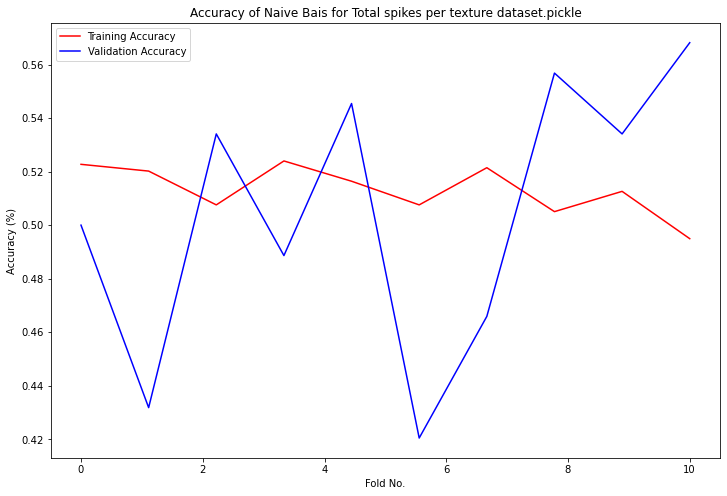

In [8]:
# Print mean values for accuracies
#print(train_accuracy_mean)
print(val_accuracy_mean)
print(np.max(val_accuracies))

# Plot this data
x = np.linspace(0, len(train_accuracies), len(train_accuracies))

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(x, train_accuracies, color='r',label='Training Accuracy')
ax.plot(x, val_accuracies, color='b',label='Validation Accuracy')
plt.xlabel("Fold No.")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of Naive Bais for " + DATA_NAME)
plt.savefig(GRAPH_PATH + " Bayes accuracy.png")
ax.legend()
plt.show()

0.5132575757575758
0.5045454545454546


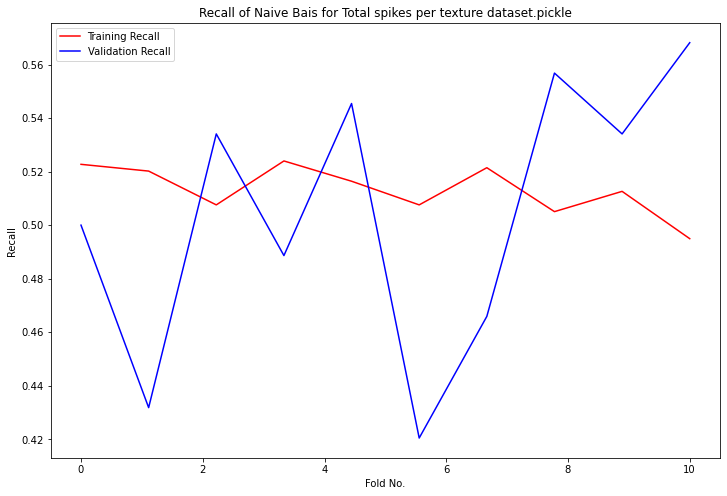

In [11]:
# Print mean values for recall
print(train_recall_mean)
print(val_recall_mean)

# Plot this data
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(x, train_recall, color='r',label='Training Recall')
ax.plot(x, val_recall, color='b',label='Validation Recall')
plt.xlabel("Fold No.")
plt.ylabel("Recall")
plt.title("Recall of Naive Bais for " + DATA_NAME)
plt.savefig(GRAPH_PATH + " Bayes recall.png")
ax.legend()
plt.show()

0.5132575757575758
0.5045454545454546


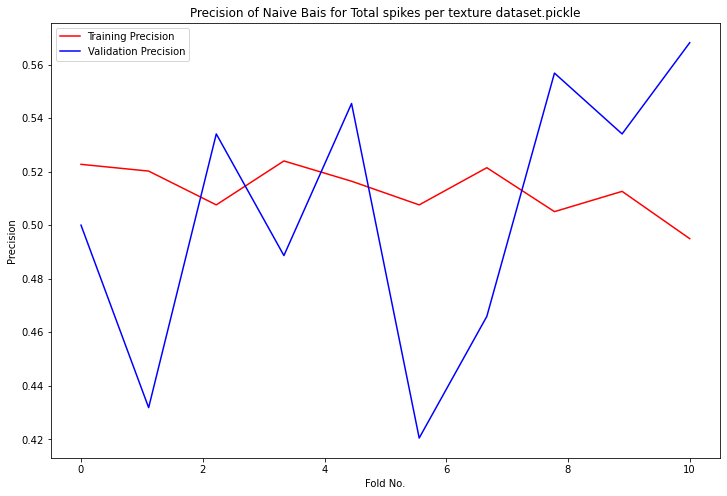

In [12]:
# Print mean values for precision
print(train_precision_mean)
print(val_precision_mean)

# Plot this data
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(x, train_precision, color='r',label='Training Precision')
ax.plot(x, val_precision, color='b',label='Validation Precision')
plt.xlabel("Fold No.")
plt.ylabel("Precision")
plt.title("Precision of Naive Bais for " + DATA_NAME)
plt.savefig(GRAPH_PATH + " Bayes precision.png")
ax.legend()
plt.show()

In [13]:
SAVE_PATH = '/home/farscope2/Documents/PhD/Spiking Nets Project/SpikingNetsTexture/graphs/spike_classifier/'

In [14]:
Y_true = [item for sublist in Y_true for item in sublist]
#print(Y_true)
Y_Pred = [item for sublist in Y_Pred for item in sublist]

In [15]:
cnf_matrix = confusion_matrix(Y_true, Y_Pred)

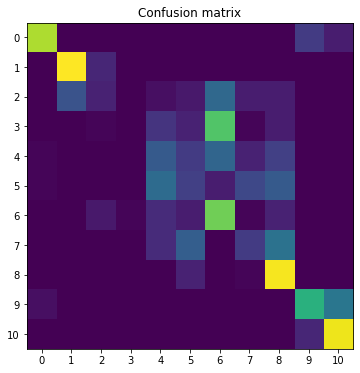

array([[65,  0,  0,  0,  0,  0,  0,  0,  0, 13,  6],
       [ 0, 74,  8,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 19,  7,  0,  3,  5, 25,  6,  6,  0,  0],
       [ 0,  0,  1,  0, 11,  7, 54,  1,  6,  0,  0],
       [ 1,  0,  0,  0, 21, 13, 24,  7, 14,  0,  0],
       [ 1,  0,  0,  0, 26, 14,  6, 16, 21,  0,  0],
       [ 0,  0,  5,  1,  9,  6, 58,  1,  7,  0,  0],
       [ 0,  0,  0,  0,  9, 22,  0, 13, 28,  0,  0],
       [ 0,  0,  0,  0,  0,  7,  0,  1, 73,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0, 47, 29],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  8, 72]])

In [16]:
plt.figure(figsize=(6, 6))
plt.xticks(range(11))
plt.yticks(range(11))
plt.imshow(cnf_matrix)
plt.title('Confusion matrix')
plt.savefig(SAVE_PATH + DATA_NAME + " BAYES confusion.png")
plt.show()
cnf_matrix

In [17]:
norm = np.linalg.norm(cnf_matrix)
normal_cnf = cnf_matrix/norm

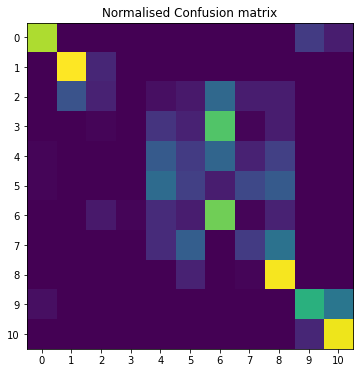

array([[0.34241842, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.06848368,
        0.03160785],
       [0.        , 0.3898302 , 0.04214381, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.10009154, 0.03687583, 0.        , 0.01580393,
        0.02633988, 0.13169939, 0.03160785, 0.03160785, 0.        ,
        0.        ],
       [0.        , 0.        , 0.00526798, 0.        , 0.05794773,
        0.03687583, 0.28447069, 0.00526798, 0.03160785, 0.        ,
        0.        ],
       [0.00526798, 0.        , 0.        , 0.        , 0.11062749,
        0.06848368, 0.12643142, 0.03687583, 0.07375166, 0.        ,
        0.        ],
       [0.00526798, 0.        , 0.        , 0.        , 0.13696737,
        0.07375166, 0.03160785, 0.08428761, 0.11062749, 0.        ,
        0.        ],
       [0.        , 0.        , 0.02633988, 0.00526798, 0.

In [18]:
plt.figure(figsize=(6, 6))
plt.xticks(range(11))
plt.yticks(range(11))
plt.imshow(normal_cnf)
plt.title('Normalised Confusion matrix')
plt.savefig(SAVE_PATH + DATA_NAME + " BAYES normalised confusion.png")
plt.show()
normal_cnf